In [56]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
import numpy as np


data_train, data_test = tf.keras.datasets.mnist.load_data()
(image_train, labels_train)= data_train
(image_test, labels_test)= data_test

class_names = ['0', '1','2','3','4','5','6','7','8','9']

In [57]:
image_train = image_train.reshape((-1,28,28,1))/255
image_test = image_test.reshape((-1,28,28,1))/255

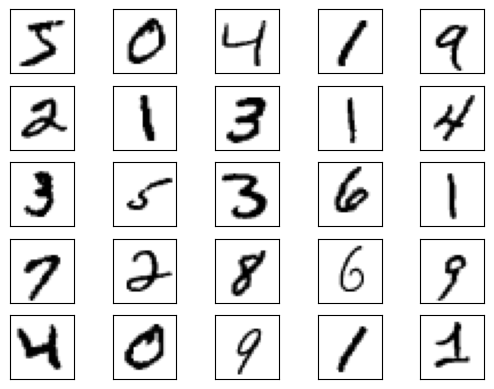

In [58]:
import matplotlib.pyplot as plt

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image_train[i], cmap = plt.cm.binary)
plt.show()

Text(0, 0.5, 'y')

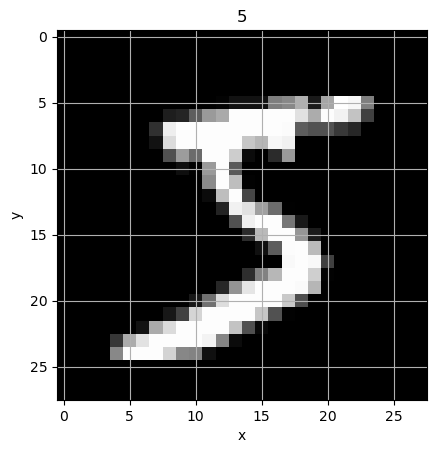

In [59]:
plt.imshow(image_train[0], cmap = plt.cm.gray)
plt.title(class_names[labels_train[0]])
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

In [60]:
model=keras.models.Sequential([
    layers.Conv2D(32,(3,3), padding ='same', activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2),strides=2),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu' ),
    layers.Dropout(0.2),
    layers.Dense(10,activation = 'softmax')
])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 804,554 (3.07 MB)

 Trainable params: 804,554 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy']) 

In [62]:
model.fit(image_train, labels_train, epochs = 20, batch_size = 100,validation_data = (image_test,labels_test),verbose = 1)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8725 - loss: 0.4408 - val_accuracy: 0.9781 - val_loss: 0.0728
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9760 - loss: 0.0806 - val_accuracy: 0.9829 - val_loss: 0.0558
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9840 - loss: 0.0529 - val_accuracy: 0.9845 - val_loss: 0.0462
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9886 - loss: 0.0383 - val_accuracy: 0.9858 - val_loss: 0.0402
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9909 - loss: 0.0286 - val_accuracy: 0.9872 - val_loss: 0.0397
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9920 - loss: 0.0246 - val_accuracy: 0.9883 - val_loss: 0.0402
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9942 - loss: 0.0187 - val_accuracy: 0.9870 - val_loss: 0.0392
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9954 - loss: 0.0149 - val_accuracy: 0.

In [63]:
model.save('mnist.keras')

In [70]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model

model = load_model('mnist.keras')  

image_folder = "C:\\Users\\OWNER\\team7\\"

def preprocess_image(img):
    img = img.resize((28, 28))  
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    img_array = img_array / 255.0  
    return img_array

def predict_images(image_folder):
    predictions = []
    correct_predictions = 0
    total_images = 0
    for filename in os.listdir(image_folder):
        img_path = os.path.join(image_folder, filename)
        img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
        img_array = preprocess_image(img)
        prediction = model.predict(img_array)
        predicted_digit = np.argmax(prediction)
        predictions.append((img_path, predicted_digit))
        
        # 테스트 데이터 정확도 계산
        total_images += 1
        if predicted_digit == int(filename[0]):  # 이미지 파일명의 첫 번째 문자는 실제 레이블을 나타냄
            correct_predictions += 1
    
    accuracy = correct_predictions / total_images
    print("Accuracy:", accuracy)
    
    return predictions

predictions = predict_images(image_folder)

for img_path, predicted_digit in predictions:
    print(f"Image: {img_path}, Predicted digit: {predicted_digit}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Accuracy: 0.3
Image: C:\Users\OWNER\team7\0.png, Predicted digit: 2
Image: C:\Users\OWNER\team7\1.png, Predicted digit: 6
Image: C:\Users\OWNER\team7\2.png, Predicted digit: 2
Image: C:\Users\OWNER\team7\3.png, Predicted digit: 2
Image: C:\Users\OWNER\team7\4.png, Predicted digit: 6
Image: C:\Users\OWNER\team7\5.png, Predicted digit: 2
Image: C:\Users\OWNER\team7\6.png, Predicted digit: 6
Image: C:\Users\OWNER\team7\7.png, Predicted digit: 7
Image: C:\Users\OWNER\team7\8.png, Predicted digit: 3
Image: C:\Users\OWNER\team7\9.png, Predicted digit: 8
